# **Space X  Falcon 9 First Stage Landing Prediction**


## Machine Learning Prediction


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   Here we will create a machine learning pipeline  to predict if the first stage will land or not.

شرکت اسپیس ایکس ادعا می‌کنه پرتاب موشک فالکون 9 رو با قیمت 62 میلیون دلار انجام میده. بقیه شرکت‌ها برای هر پرتاب بالای 165 میلیون دلار دریافت می‌کنن. خیلی از این پس‌انداز به خاطر اینه که اسپیس ایکس می‌تونه استیج اول موشک رو دوباره استفاده کنه. پس اگه بتونیم پیش‌بینی کنیم که آیا مرحله اول موشک می‌تونه فرود بیاد یا نه، می‌تونیم هزینه پرتاب رو هم حدس بزنیم. این اطلاعات می‌تونه به شرکت‌های دیگه کمک کنه تا اگه بخوان برای یه پرتاب موشکی با اسپیس ایکس رقابت کنن بتونن قیمت پیشنهادیشون رو مشخص کنن. اینجا می‌خوایم با استفاده از یادگیری ماشین پیش‌بینی کنیم که آیا استیج اول موشک فرود میاد یا نه.



## Import Libraries and Define Auxiliary Functions


We will import the following libraries 


In [302]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# Random Forest classification algorithm
from sklearn.ensemble import RandomForestClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier


# This function is to plot the confusion matrix for the project.


In [304]:
def plot_confusion_matrix(y,y_predict):
    """this function plots the confusion matrix"""
    from sklearn.metrics import confusion_matrix
    fig = plt.figure(figsize = (8, 3))

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    

## Load the dataframe


In [306]:
df_falcon9 = pd.read_csv('dataset_falcon9.csv')

df_falcon9.head(100)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857,1


In [307]:
df_falcon9.iloc[0,1]

'2010-06-04'

In [308]:
Preprocessed = pd.read_csv('preprocessed_spaceX_df.csv')
Preprocessed.head(100)

,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Class,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,6104,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,525,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,677,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,500,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3170,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,15400,2,1,1,1,5,2,1,0,0,...,0,0,0,0,0,0,0,0,1,0
86,15400,3,1,1,1,5,2,1,0,0,...,0,0,0,0,0,0,1,0,0,0
87,15400,6,1,1,1,5,5,1,0,0,...,0,0,0,1,0,0,0,0,0,0
88,15400,3,1,1,1,5,2,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [309]:
Preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 80 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   PayloadMass                          90 non-null     int64
 1   Flights                              90 non-null     int64
 2   GridFins                             90 non-null     int64
 3   Reused                               90 non-null     int64
 4   Legs                                 90 non-null     int64
 5   Block                                90 non-null     int64
 6   ReusedCount                          90 non-null     int64
 7   Class                                90 non-null     int64
 8   Orbit_ES-L1                          90 non-null     int64
 9   Orbit_GEO                            90 non-null     int64
 10  Orbit_GTO                            90 non-null     int64
 11  Orbit_HEO                            90 non-null     int64
 

## Define X ,Y

In [311]:
X = Preprocessed.drop("Class", axis=1)
Y = Preprocessed["Class"]

In [312]:
X

,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,6104,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,525,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,677,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,500,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3170,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,15400,2,1,1,1,5,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
86,15400,3,1,1,1,5,2,0,0,0,...,0,0,0,0,0,0,1,0,0,0
87,15400,6,1,1,1,5,5,0,0,0,...,0,0,0,1,0,0,0,0,0,0
88,15400,3,1,1,1,5,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Standardize Features

In [314]:
transform = preprocessing.StandardScaler()
x_scaled = transform.fit_transform(X)
x_scaled

array([[-1.90400359e-04, -6.53912840e-01, -1.87082869e+00, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [-1.19521445e+00, -6.53912840e-01, -1.87082869e+00, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [-1.16265599e+00, -6.53912840e-01, -1.87082869e+00, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       ...,
       [ 1.99101655e+00,  3.49060516e+00,  5.34522484e-01, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [ 1.99101655e+00,  1.00389436e+00,  5.34522484e-01, ...,
        -2.15665546e-01,  5.38516481e+00, -1.05999788e-01],
       [-5.19197979e-01, -6.53912840e-01,  5.34522484e-01, ...,
        -2.15665546e-01, -1.85695338e-01,  9.43398113e+00]])

In [315]:
col=X.columns
X = pd.DataFrame(x_scaled, columns=col)
X

,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,-0.000190,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,-0.654654,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
1,-1.195214,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,-0.654654,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
2,-1.162656,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,-0.654654,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
3,-1.200569,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,-0.654654,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
4,-0.628654,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,1.527525,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1.991017,0.174991,0.534522,1.196843,0.517306,0.945537,0.202528,-0.106,-0.106,-0.654654,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,5.385165,-0.106000
86,1.991017,1.003894,0.534522,1.196843,0.517306,0.945537,0.202528,-0.106,-0.106,-0.654654,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,5.385165,-0.215666,-0.185695,-0.106000
87,1.991017,3.490605,0.534522,1.196843,0.517306,0.945537,1.966480,-0.106,-0.106,-0.654654,...,-0.215666,-0.267261,-0.106,4.123106,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
88,1.991017,1.003894,0.534522,1.196843,0.517306,0.945537,0.202528,-0.106,-0.106,-0.654654,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,5.385165,-0.106000


## Train- Test Split


In [317]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=101)

## Logistic Regression


In [319]:
lr=LogisticRegression()
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}
logreg_cv = GridSearchCV(lr, parameters,cv=4)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [321]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8427083333333334


Calculate the accuracy on the test data using the method <code>score</code>:


In [323]:
accu=[]
methods=[]
accu.append(logreg_cv.score(X_test,Y_test))
methods.append('logistic regression')
logreg_cv.score(X_test,Y_test)

0.7777777777777778

## Confusion Matrix:


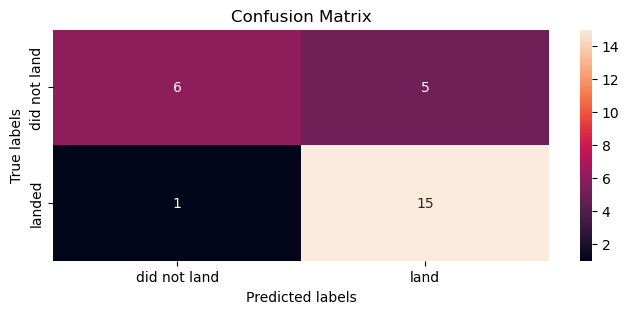

In [325]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## Support Vector Machine


In [327]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': (0.5, 1, 1.5)}
svm = SVC()

In [328]:
svm_cv = GridSearchCV(svm, parameters, cv = 10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': (0.5, 1, 1.5),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [329]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'kernel': 'sigmoid'}
accuracy : 0.8285714285714286


Calculate the accuracy on the test data using the method <code>score</code>:


In [331]:
accu.append(svm_cv.score(X_test,Y_test))
methods.append('support vector machine')
svm_cv.score(X_test,Y_test)

0.8148148148148148

### Confusion Matrix


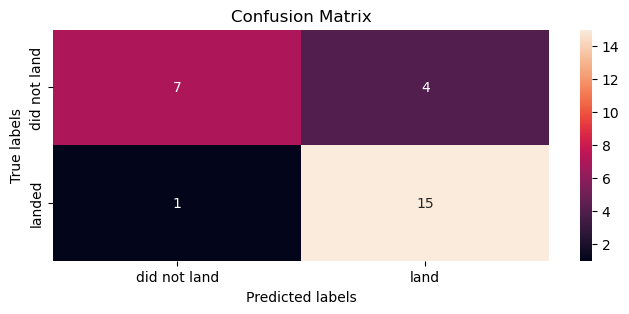

In [333]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## Decision Trees


In [335]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [336]:
tree_cv = GridSearchCV(tree, parameters, cv = 10)
tree_cv.fit(X_train, Y_train)

E:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "E:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "E:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "E:\ProgramData\anaconda3\Lib\site-pac

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [337]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
accuracy : 0.9071428571428571


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [339]:
accu.append(tree_cv.score(X_test,Y_test))
methods.append('decision tree classifier')
tree_cv.score(X_test,Y_test)

0.8148148148148148

### Confusion Matrix


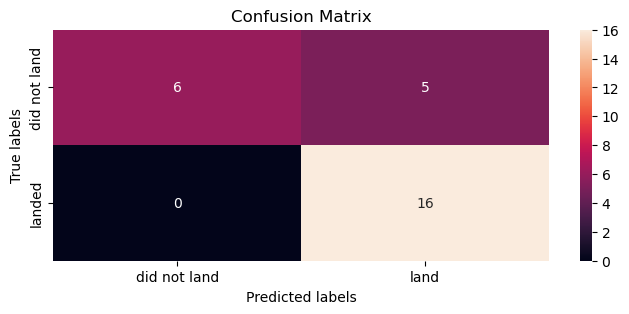

In [341]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## Random Forest

In [343]:
parameters = {'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10],  'n_estimators': [10,20,30] }

rfc = RandomForestClassifier()

In [344]:
rfc_cv = GridSearchCV(rfc, parameters, cv = 10)
rfc_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 30]})

In [345]:
print("tuned hpyerparameters :(best parameters) ",rfc_cv.best_params_)
print("accuracy :",rfc_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
accuracy : 0.8904761904761905


In [346]:
accu.append(rfc_cv.score(X_test,Y_test))
methods.append('Random Forest classifier')
rfc_cv.score(X_test,Y_test)

0.8148148148148148

### Confusion Matrix

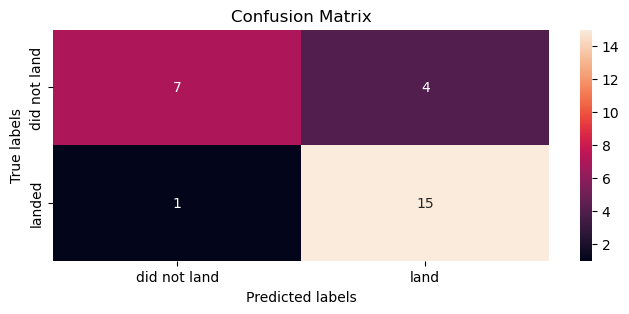

In [348]:
yhat = rfc_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## K Nearest Neighbors

In [350]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [351]:
knn_cv = GridSearchCV(KNN, parameters, cv = 10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [352]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 6, 'p': 1}
accuracy : 0.8428571428571429


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [354]:
accu.append(knn_cv.score(X_test,Y_test))
methods.append('k nearest neighbors')
knn_cv.score(X_test,Y_test)

0.7037037037037037

### Confusion Matrix


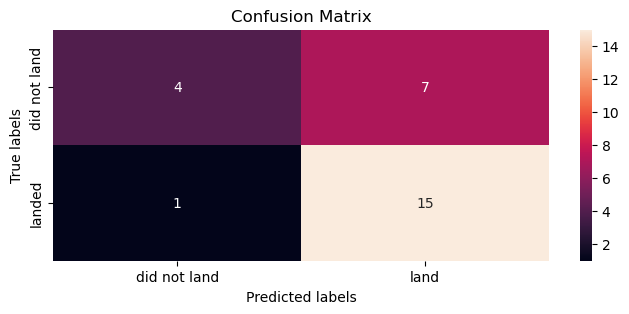

In [356]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

# Find the method performs best:


In [358]:
print(methods)
print(accu)

['logistic regression', 'support vector machine', 'decision tree classifier', 'Random Forest classifier', 'k nearest neighbors']
[0.7777777777777778, 0.8148148148148148, 0.8148148148148148, 0.8148148148148148, 0.7037037037037037]


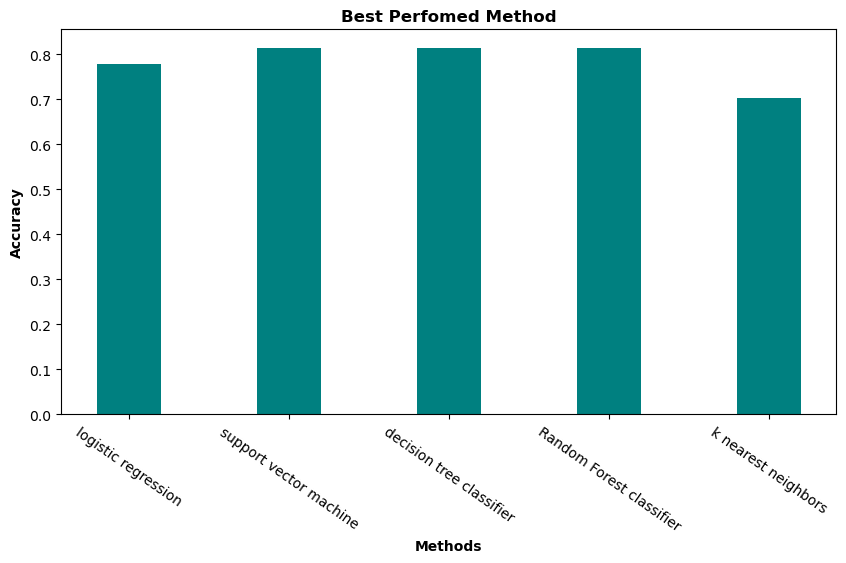

In [359]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(methods, accu, color ="#008080",width = 0.4)
 
plt.xlabel("Methods", fontweight='bold')
plt.ylabel("Accuracy", fontweight='bold')
plt.title("Best Perfomed Method", fontweight='bold')
plt.xticks(rotation=-35)
plt.show()

# SAVE-LOAD the trained model using pickle 


In [361]:
import pickle

In [362]:
# save
with open('spacexclassification.pkl','wb') as f: pickle.dump(logreg_cv,f)


## ROC Curve

In [364]:
from sklearn.metrics import RocCurveDisplay

Text(0.5, 1.0, 'Area Under ROC')

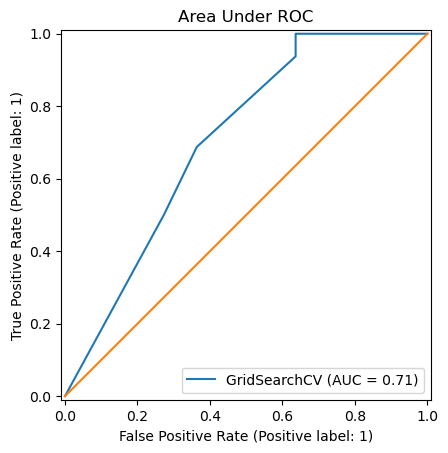

In [365]:
RocCurveDisplay.from_estimator(knn_cv,X_test,Y_test)
plt.plot([0,1],[0,1])
plt.title('Area Under ROC')

Text(0.5, 1.0, 'Area Under ROC')

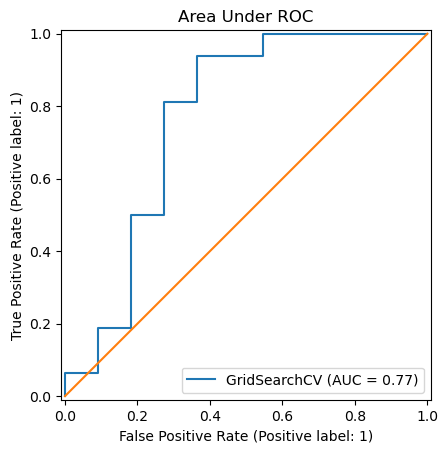

In [366]:
RocCurveDisplay.from_estimator(logreg_cv,X_test,Y_test)
plt.plot([0,1],[0,1])
plt.title('Area Under ROC')

Text(0.5, 1.0, 'Area Under ROC')

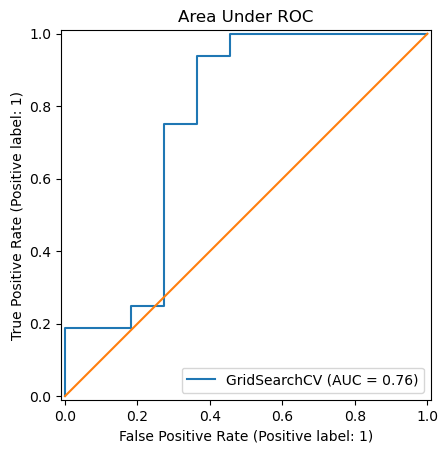

In [367]:
RocCurveDisplay.from_estimator(svm_cv,X_test,Y_test)
plt.plot([0,1],[0,1])
plt.title('Area Under ROC')

Text(0.5, 1.0, 'Area Under ROC')

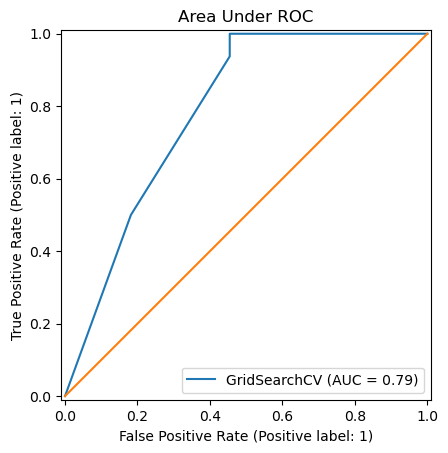

In [368]:
RocCurveDisplay.from_estimator(tree_cv,X_test,Y_test)
plt.plot([0,1],[0,1])
plt.title('Area Under ROC')

Text(0.5, 1.0, 'Area Under ROC')

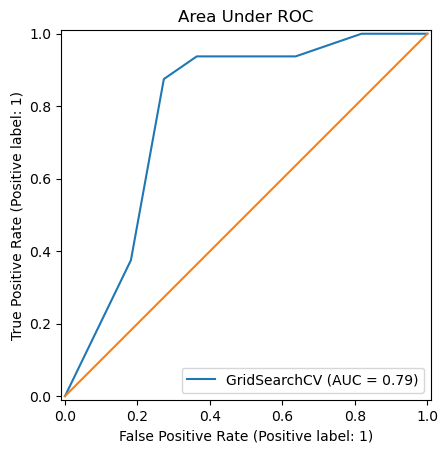

In [369]:
RocCurveDisplay.from_estimator(rfc_cv,X_test,Y_test)
plt.plot([0,1],[0,1])
plt.title('Area Under ROC')

# Imbalance Data

<Axes: xlabel='Class', ylabel='count'>

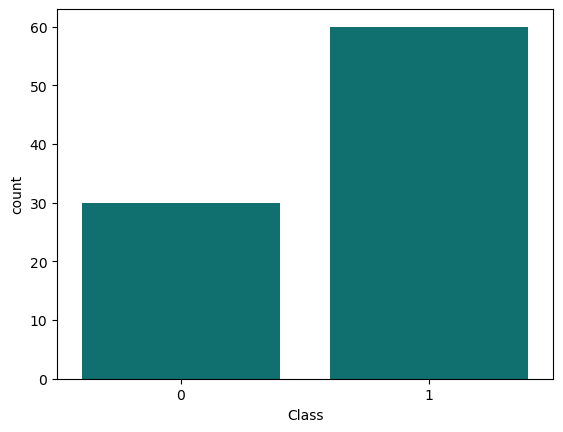

In [371]:
sns.countplot(x ='Class', data = df_falcon9, color ="#008080")